In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

%matplotlib inline

In [6]:
df = pd.read_csv('./assets/full_current_df.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df['grade'].value_counts()

A    72692
B     6575
C     2133
P     1744
Z     1152
N      346
G        2
Name: grade, dtype: int64

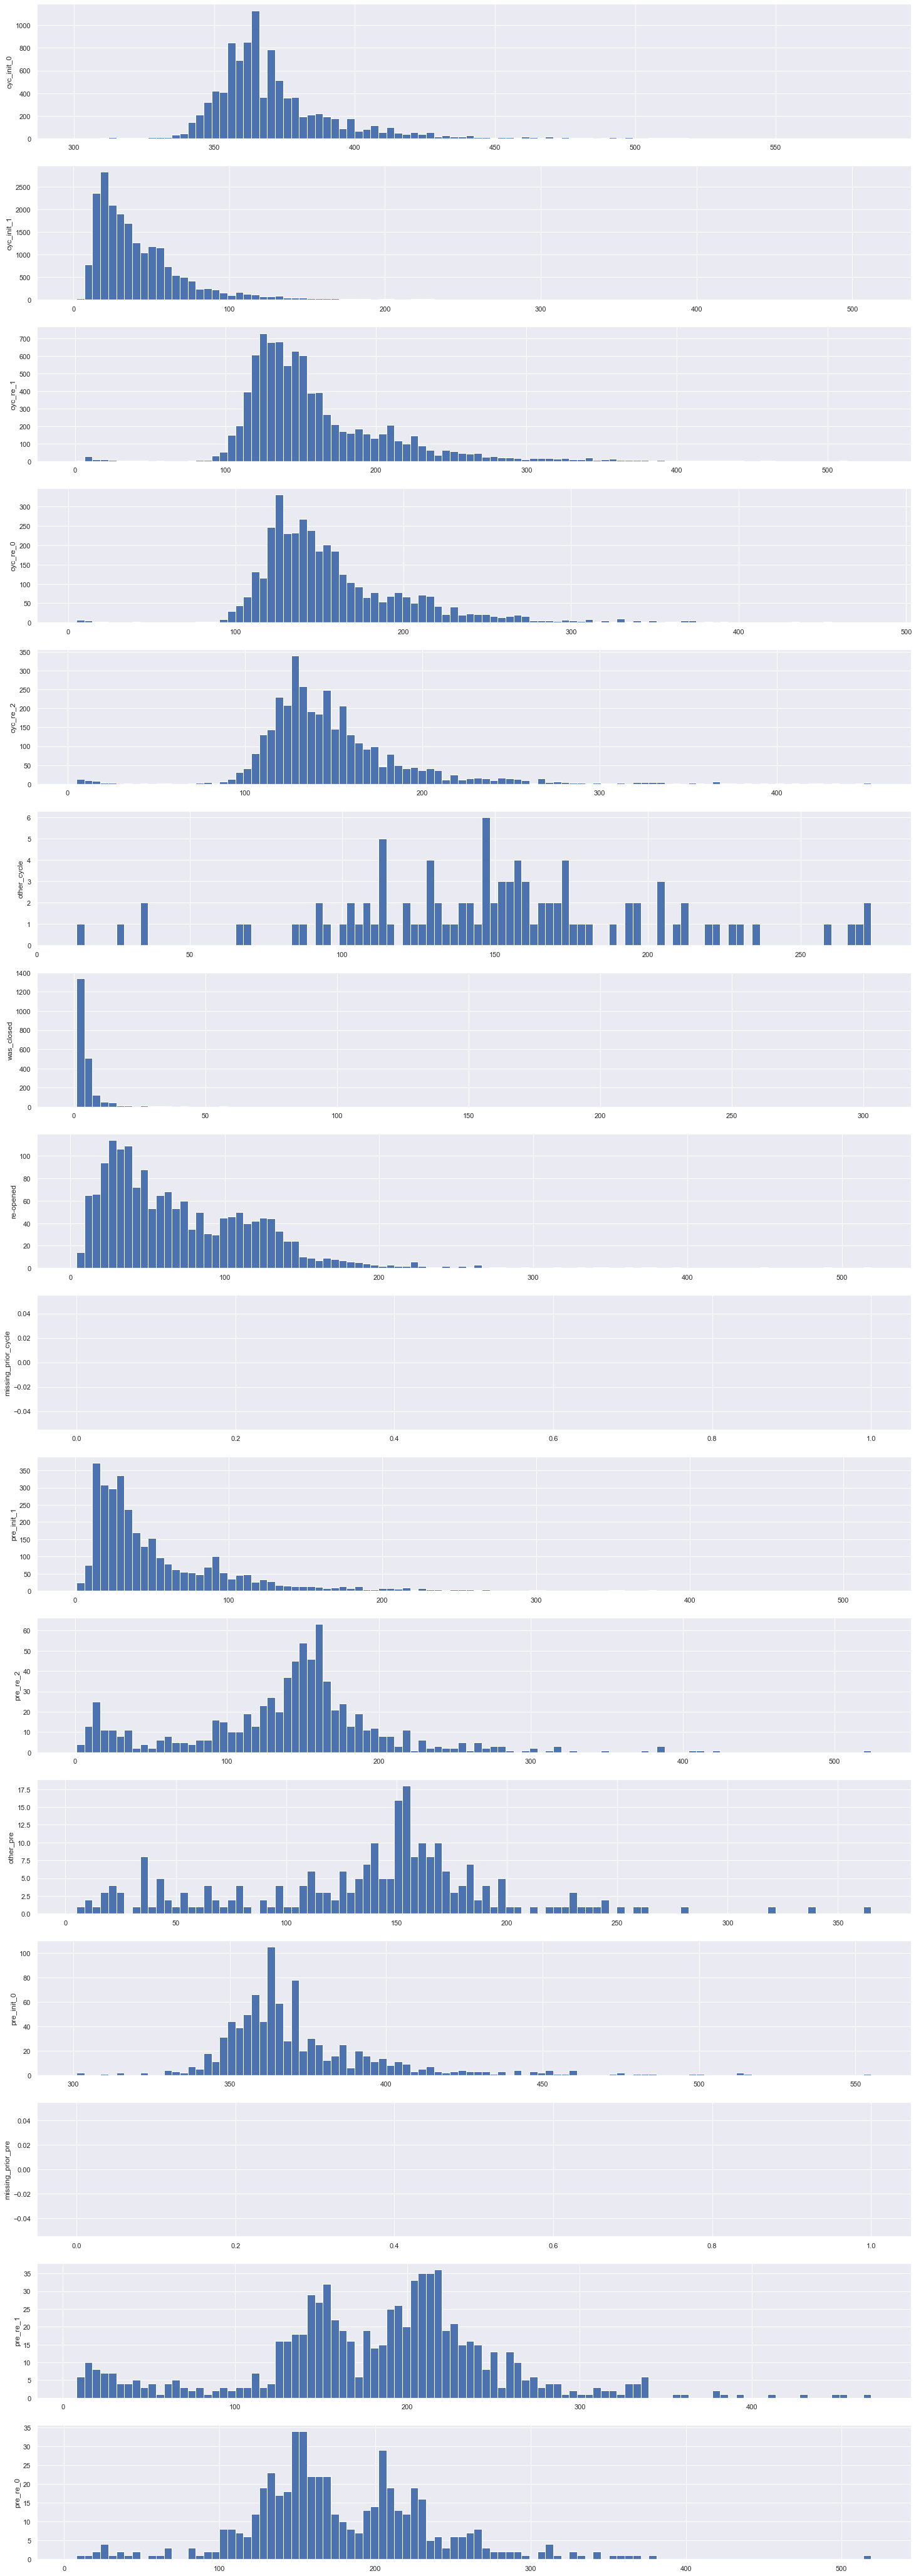

In [16]:
bin_types = df['inspection_bin'].unique()
plt.figure(figsize=(25,75))

count = 1
for i in bin_types:
    plt.subplot(len(bin_types), 1, count)
    x = df[(df['inspection_bin']==i) & (df['event']==1) & (df['inspection_date']>='2018-01-01')]['time_til']
    plt.hist(x, bins=100)
    plt.ylabel(i)
    count += 1
    
plt.show()

In [ ]:
f, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,7))

axes[0][0].hist(df[(df.SCORE > 0) & (df.SCORE < 50)].SCORE,bins=50, color="grey",alpha=0.5)
axes[0][0].set_title("ALL")

for ax, boro in zip(axes.ravel()[1:], df.BORO.unique()):
    ax.hist(df[(df.SCORE > 0) & (df.SCORE < 50) & (df.BORO == boro)].SCORE,bins=50, color="grey",alpha=0.5)
    ax.set_title(boro)
    
    
for ax in axes.ravel():
    ax.axvline(13,color=colors["A"],linestyle="-")
    ax.text(0.12, 0.85,"A",color=colors["A"],transform=ax.transAxes,fontsize=20)
    ax.axvline(27,color=colors["B"],linestyle="-")
    ax.text(0.35, 0.85,"B",color=colors["B"],transform=ax.transAxes,fontsize=20)
    ax.text(0.7, 0.85,"C",color=colors["C"],transform=ax.transAxes,fontsize=20)
    ax.set_xlabel("Score")

In [45]:
date_dic = {'cyc_init_0':(334, 395), 'cyc_init_1': ,'cyc_re_1':, 'cyc_re_0':, 'cyc_re_2':}
for i in df['inspection_bin'].unique()[:5]:


array(['cyc_init_0', 'cyc_init_1', 'cyc_re_1', 'cyc_re_0', 'cyc_re_2'],
      dtype=object)

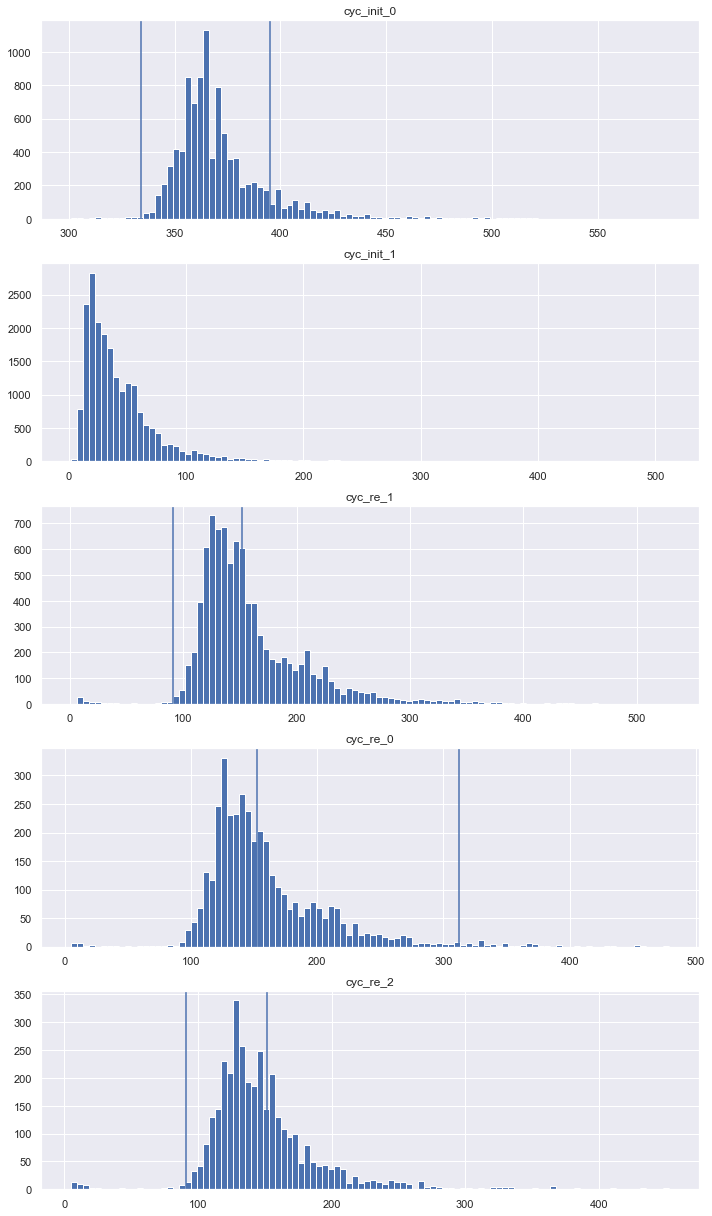

In [49]:
f, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,17))

for ax, insp_bin in zip(axes, df['inspection_bin'].unique()[:5]):
    x = df[(df['inspection_bin']==insp_bin) & (df['event']==1) & \
           (df['inspection_date']>='2018-01-01')]['time_til']
    ax.hist(x, bins=100)
    ax.set_title(insp_bin)
        
for ax in axes:
    ax.set_label("Days Since Last Inspection")
    
axes[0].axvline(334)
axes[0].axvline(395)
axes[3].axvline(152)
axes[3].axvline(312)
axes[2].axvline(91)
axes[2].axvline(152)
axes[4].axvline(91)
axes[4].axvline(152)

    
plt.tight_layout()

I was first drawn to the question of timing between inspections.  How often does the DOH come within the stated windows?

Which violations are most common?

In [14]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

all_violations = pd.read_csv('./assets/archive/DOHMH_New_York_City_Restaurant_Inspection_Results_9_11_19.csv')            
all_violations.dropna(axis=0, subset=['INSPECTION TYPE','VIOLATION CODE'], inplace=True)
violation_counts = all_violations[all_violations['INSPECTION TYPE'].str.contains('Cycle')]['VIOLATION CODE'].value_counts()
# violation_counts = all_violations['VIOLATION CODE'].value_counts()


desc = all_violations[['VIOLATION CODE','VIOLATION DESCRIPTION']].drop_duplicates().set_index('VIOLATION CODE')
violation_df = pd.concat([violation_counts,desc], axis=1).reset_index()
violation_df.columns = ['code', 'count','description']
violation_df.sort_values('count',ascending=False, inplace=True)
violation_df.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [15]:
datas = violation_df[:30]
fig = px.bar(datas, x='code', y='count',
            hover_data=['description'], color='count')

fig.show()

In [116]:
violation_df['percent_of_total'] = violation_df['count'] / violation_df['count'].sum()